# Investigating K-fold Cross Validation

# TOC
___
[Sect.1: Introduction](#Sect.1)

[Sect.2: Linear Regression Model](#Sect.2)

[Sect.3: Linear Regression Model on Census Data ](#Sect.3)

[Sect.4: K-fold Cross Validation](#Sect.4)

[Sect.5: Comparison with Leave One Out Validation](#Sect.5)

# Sect.1
# Introduction
[Back to top](#TOC)

# Sect.2
# Linear Regression Model
[Back to top](#TOC)

In this section we will:
- Import Census population data
- Set up methods to create a linear regression model based on training data inputted with expected target values

In [490]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

### Least squares estimator

$$y = \beta X + \epsilon $$

Least Squares Estimator (Best Linear Unbiased Estimator) of model parameters (Wasserman p217):

$$ \hat{\beta} = (X'X)^{-1}(X'Y)$$

The data will be split into:
- training data
- testing data

The value of $\hat{\beta}$ will be estimated using the training data.

This will then be evaluated on the testing data, by finding predicted values for the testing input variables as follows:

$$\hat{y} = X_{test} \ \hat{\beta}$$

Then the predicted testing outputs $\hat{y}$ will be compared to the actual testing output variables using Mean Squared Prediction Error:

MSPE = $$\frac{1}{n} \sum_1^n {\left( \hat{y} - y_i\right)}$$

In [491]:
def linear_regression(x_train, y_train):
    '''
    input: x_train (arraylike, size: n x p)
            y_train (arraylike, size: n x 1)
            
    Uses the least squares estimator to create a model (b_hat) which is returned 
    
    output: b_hat (arraylike, size p x 1)
    '''
    x_prime = x_train.T
    
    # TEST
    #print("X train: \n", x_train)
    #print(" Y train: \n", y_train)
    #print("x_prime: \n", x_prime)
    
    # Calculate the Least Squares Estimates of model coefficients
    # B_hat = ( X'X)^-1 X'Y
    first_term = np.linalg.inv( np.matmul(x_prime, x_train) )
    second_term = np.matmul(first_term , x_prime)
    B_hat = np.matmul( second_term ,  y_train)
    
    return B_hat

To test the linear regression model, we will use a linear dataset and try to find the original parameters of the generating model:

### Make dataset to test lin reg

In [492]:
def prepare_inputs(y_train, *x_trains):
    '''
    Takies in np.arrays y_train, and 1+ x_trains 
    
    It checks if the y_train and x_train are the same length
    
    then it transposes the y_train and 
    '''
    first_col = x_trains[0]
    for col in x_trains:
        assert(len(first_col) == len(col))
    
    # Join x_train columns
    input_vars = np.array(x_trains)
    
    # Transpose
    input_vars = np.transpose(input_vars)
    
    # Add extra column of ones
    ones_col = np.transpose(np.matrix(np.ones(first_col.shape[0])))
    input_vars = np.append(ones_col,input_vars,  axis=1)
    
    # Transpose y train
    y_train = np.transpose(np.matrix(y_train))
    
    return input_vars, y_train

 

In [493]:
# Suppose we have a generating function which takes 2 input variables (x,z) to 
# to make a target variable y:
# y =  3x + 2z + 5 + E (noise)

x = np.array([1,5,6,3,2]) #+ np.array([np.random.normal() for _ in range(len(x))])
z =  np.array([2,5,3,11,6]) 
y = 3*x + 2*z + 5 + np.array([np.random.normal() for _ in range(len(x))])

input_vars, y_train= prepare_inputs(y, x, z )

input_vars, y_train

(matrix([[ 1.,  1.,  2.],
         [ 1.,  5.,  5.],
         [ 1.,  6.,  3.],
         [ 1.,  3., 11.],
         [ 1.,  2.,  6.]]),
 matrix([[12.62281753],
         [30.41886344],
         [28.67503292],
         [37.43694609],
         [24.33313918]]))

### Create Lin Reg Model

In [494]:
B_hat = linear_regression(input_vars, y_train)

print(f"Estimate of model parameters (B_hat):\n {B_hat}")

Estimate of model parameters (B_hat):
 [[5.69827572]
 [2.77576508]
 [2.14101534]]


### Predict using Lin Reg Model

In [495]:
def predict(model, x_pred):
    '''
    input: model (arraylike, size: p x 1)
            x_pred (arraylike, size m x p)
            
    Uses the least squares estimator model (b_hat) from the linear_regression function to 
    make a prediction for what the output set (y_pred) would be given a certain input set (x_pred)
    
    [y_pred] = [x_pred] * [b_hat] 
    asserts that the num. columns in x_pred = the rows of the model (p)
    
    output: y_pred (arraylike, size m x 1)
    '''
    print("Model shape: ", model.shape)
    print("Input shape: " , x_pred.shape)
    
    #Check if multiplyable 
    assert(model.shape[0] == x_pred.shape[1])
    y_pred = np.matmul(x_pred, model)
    

    # Convert to 1 and 0 predictions
    y_pred = np.ravel(y_pred)
    for index in range(len(y_pred)):
        if(y_pred[index]>=0.5):
            y_pred[index] = 1
        else:
            y_pred[index] = 0
        

    return np.matrix(y_pred)

In [496]:
# Test what model predicts for new inputs:
x_pred = np.array([1,2,3,6,4,7]) #+ np.array([np.random.normal() for _ in range(len(x))])
z_pred =  np.array([5,6,7,8,9,10]) 
y_pred = 3*x_pred + 2*z_pred + 5 + np.array([np.random.normal() for _ in range(len(x_pred))])

input_vars, y_train= prepare_inputs(y_pred, x_pred, z_pred)

input_vars, y_train

(matrix([[ 1.,  1.,  5.],
         [ 1.,  2.,  6.],
         [ 1.,  3.,  7.],
         [ 1.,  6.,  8.],
         [ 1.,  4.,  9.],
         [ 1.,  7., 10.]]),
 matrix([[19.7716427 ],
         [22.52603838],
         [27.78062435],
         [38.9734981 ],
         [33.34279826],
         [45.36870223]]))

In [497]:
# Try to preditct:
y_prediction = predict(B_hat , input_vars)
y_prediction_matrix = zip(y_prediction.T, y_train)

print(f"predicted\t actual \t\t diff")
MSE = 0
for y_p , y_t in y_prediction_matrix:
    error = y_p[0] -y_t[0]
    MSE +=  error**2
    print(f"{y_p[0]}\t{y_t[0]}\t{error}")

print("MSE is :", MSE/len(y_prediction))


Model shape:  (3, 1)
Input shape:  (6, 3)
predicted	 actual 		 diff
[[1.]]	[[19.7716427]]	[[-18.7716427]]
[[1.]]	[[22.52603838]]	[[-21.52603838]]
[[1.]]	[[27.78062435]]	[[-26.78062435]]
[[1.]]	[[38.9734981]]	[[-37.9734981]]
[[1.]]	[[33.34279826]]	[[-32.34279826]]
[[1.]]	[[45.36870223]]	[[-44.36870223]]
MSE is : [[5989.57163311]]


### Calculating MSPE of prediction

In [498]:
def MSPE(y_predicted, y_train):
    '''
    Mean Square Predictiona error:
    
    input: y_predicted (arraylike, size: m x 1)
           y (arraylike, size m x 1)
            
    Finds the sum of squared differences between the predicted y values in the training set
    and the observed y_train values
    '''
  
    assert(len(y_predicted) == len(y_train))
    
    errors = np.subtract(y_predicted , y_train)
    
    #print("Y pred:\n", y_predicted)
    #print("Y train:\n", y_train)
    
    # MSPE = (predicted - actual)**2 / n
    mean_error = np.matmul( errors.T, errors) / len(y_train)
    #print("Mean squared errors: ", mean_error)
    
    '''
    #print side by side - BETTER
    print(f"predicted\t actual \t\t diff")
    MSE = 0
    for y_p , y_t in y_prediction_matrix:
        error = y_p[0] -y_t[0]
        MSE +=  error**2
        print(f"{y_p[0]}\t{y_t[0]}\t{error}")

    print("MSE is :", MSE/len(y_prediction))
    '''
    
    return errors,mean_error[0,0]

In [499]:
# Find MSPE of the estimates:

MSPE_errors, error = MSPE(y_prediction.T, y_train )
print("Mean Squared Prediction Error: ", error)
MSPE_errors, error

Mean Squared Prediction Error:  998.2619388516268


(matrix([[-18.7716427 ],
         [-21.52603838],
         [-26.78062435],
         [-37.9734981 ],
         [-32.34279826],
         [-44.36870223]]),
 998.2619388516268)

In [500]:
def prepare_input_matrix(data , target_col = 'target'):
    '''
    Takes in a matrix like input (input_vars) 
    
    Separtates into X matrix (features, size: n x m) and Y matrix ( target, size: n x 1)

    and adds a column of ones to the X matrix
    
    Returns X matrix, y matrix 
    '''
    # SPLIT INTO FEATURES (X) AND TARGET (Y)
    matrix_X =data.loc [:, data.columns != target_col]

    matrix_Y =data[target_col]

    
    # Add extra column of ones
    ones_col = np.transpose(np.matrix(np.ones(data.shape[0])))
    matrix_X = np.append(ones_col,matrix_X,  axis=1)
   
    
    return matrix_X, matrix_Y


# Sect.3
# Linear Regression Model on Heart Disease Data

Heart Disease Dataset:
- age
- sex
- cp
- trestbps
- chol
- fbs
- restecg
- thalach
- exang
- oldpeak
- slope
- ca
- thal
- target
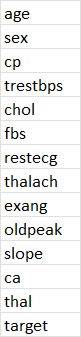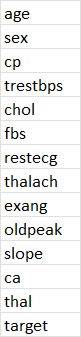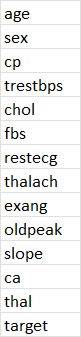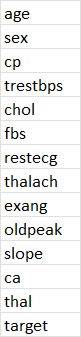

[Back to top](#TOC)

In [501]:
# Import HEART data from CSV
heart = pd.read_csv("heart.csv")
heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


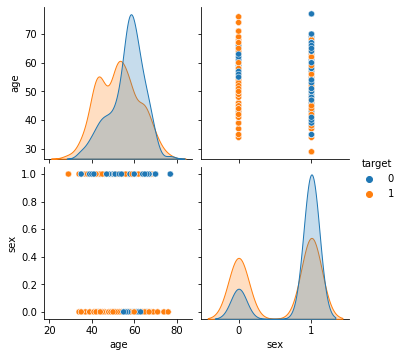

In [502]:
heart_subset = heart[['age','sex','target']]
sns.pairplot(heart_subset, hue = 'target')

In [503]:
male = heart_subset[heart_subset["sex"] == 1]
female = heart_subset[heart_subset["sex"] == 0]

len(male), len(female)

males_with_HD = len(male[male["target"] == 1])
females_with_HD = len(female[female["target"] == 1])


print(f"Percentage of Males with Heart disease: {100*males_with_HD/len(male)}%")
print(f"Percentage of Females with Heart disease: {100*females_with_HD/len(female)}%")

Percentage of Males with Heart disease: 42.07573632538569%
Percentage of Females with Heart disease: 72.43589743589743%


In [504]:
# SPLIT INTO FEATURES (X) AND TARGET (Y)
heart_X =heart.loc [:, heart.columns != "target"]

heart_Y =heart["target"]

#heart_X, heart_Y #

In [505]:
heart_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [506]:
#heart_X_plus_constant = prepare_input_matrix(heart_X)
#pd.DataFrame(heart_X_plus_constant)

In [507]:
'''
# PREPARE X matrix (add ones columns) 
# MSE without ones column (constant term) : 0.15317
heart_X_plus_constant = prepare_input_matrix(heart_X)
pd.DataFrame(heart_X_plus_constant)
'''
# split data into features (X) and target (Y). Adds col of 1's to X for constant term
heart_X_plus_constant, heart_Y = prepare_input_matrix(heart , target_col = 'target')

# RUN LIN REG ON HEART SUBSET

B_hat = linear_regression( heart_X_plus_constant, heart_Y)
print(type(B_hat))
print(f"Estimate of model parameters (B_hat):\n {B_hat}")


# Try to preditct:
y_prediction = predict(B_hat , heart_X_plus_constant)
y_prediction_matrix = zip(y_prediction.T, np.matrix(heart_Y).T)

        
print(f"predicted\t actual \t diff")
MSE = 0
for y_p , y_t in y_prediction_matrix:
    error = y_p[0] -y_t[0]
    MSE +=  error**2
    print(f"{y_p[0]}\tcd{y_t[0]}\t{error}")

MSE= MSE/len(y_prediction.T)
print("MSE is :", MSE)
print("RMSE is :", np.sqrt(MSE))

MSPE_errors, error = MSPE(np.matrix(y_prediction).T, np.matrix(heart_Y).T )
print("Mean Squared Prediction Error: ", error)
#MSPE_errors, error

<class 'numpy.ndarray'>
Estimate of model parameters (B_hat):
 [ 8.79265583e-01 -1.42957057e-03 -2.10721488e-01  1.11819732e-01
 -1.81833716e-03 -4.57972143e-04  4.22497213e-03  4.43080207e-02
  2.87814133e-03 -1.44643684e-01 -6.10202203e-02  7.62203429e-02
 -9.56119528e-02 -1.15236607e-01]
Model shape:  (14,)
Input shape:  (1025, 14)
predicted	 actual 	 diff
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[0]]	[[1.]]
[[1.]]	cd[[1]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[1.]]	cd[[0]]	[[1.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[1]]	[[-1.]]
[[1.]]	cd[[1]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[0.]]	cd[[0]]	[[0.]]
[[1.]]	cd[[1]]	[[0.]]
[[1.]]	cd[[0]]	[[1.]]
[[1.]]	cd[[0]]	[[1.]]

Heart Disease Dataset:
- age
- sex
- cp
- trestbps
- chol
- fbs
- restecg
- thalach
- exang
- oldpeak
- slope
- ca
- thal
- target

# Sect.4
#  K-fold Cross Validation
[Back to top](#TOC)

In [508]:
# Borrowed from Dr. Stephyn Butcher, "Fundementals of Data Science," p608
'''
input:
xs (list): list to be divided
n (int) : number of folds


output:
xs split into n sub-lists, each with size within 1 of (floor(len(xs)/n))  
'''
def make_folds(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

In [509]:
test = pd.DataFrame({"a": range(16)})

indices = list(range(len( test)))

folds = make_folds(indices, 5)

folds

[[0, 1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]]

In [510]:
# Borrowed from Dr. Stephyn Butcher, "Fundementals of Data Science," p608
'''
def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = make_folds(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics
'''

'\ndef cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):\n    indices = list(range(len( data)))\n    metrics = []\n    for _ in range(repetitions):\n        random.shuffle(indices)\n        folds = make_folds(indices, fold_count)\n        for fold in folds:\n            test_data = data.iloc[fold]\n            train_indices = [idx not in fold for idx in indices]\n            train_data = data.iloc[train_indices]\n            result = algorithm(formula, data=train_data)\n            model = result["model"]\n            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")\n            # y = np.ravel( y) # might need for logistic regression\n            results = models.summarize(formula, X, y, model)\n            metric = evaluate(results)\n            metrics.append(metric)\n    return metrics\n'

In [511]:
np.random.seed(1212)

def cross_validation(data, target_col ="target", fold_count=10):
    # set random seed
    np.random.seed(1212)
    
    indices = list(range(len( data)))
    metrics = []
    
    np.random.shuffle(indices)
    folds = make_folds(indices, fold_count)
    for fold in folds:
        test_data = data.iloc[fold]
        train_indices = [idx not in fold for idx in indices]
        train_data = data.iloc[train_indices]
         
        print(f"Len test:{len(test_data)}\nLen Train: {len(train_data)}")
        
        
        # split train data into features (X) and target (Y). Adds col of 1's to X for constant term
        train_data_X_plus_constant, train_Y = prepare_input_matrix(train_data , target_col = 'target')
        
        # Fit Lin Reg Model to Train data X and Y
        B_hat = linear_regression( train_data_X_plus_constant, train_Y)
        #print(f"Estimate of model parameters (B_hat):\n {B_hat}")
        
        # split test data into features (X) and target (Y). Adds col of 1's to X for constant term
        test_data_X_plus_constant, test_Y = prepare_input_matrix(test_data , target_col = 'target')
        
        # Apply model to the the test X
        test_y_prediction = predict(B_hat , test_data_X_plus_constant)

        # Assess error of prediction
        MSPE_errors, MSE = MSPE(np.matrix(test_y_prediction).T, np.matrix(test_Y).T )
        print("Mean Squared Prediction Error: ",MSE) #error)

        #metric = evaluate(results)
        metrics.append(MSE)
        
    #return test_data, train_data
    return metrics

### Run K-fold cross validation on HEART DATA with k = 5

In [512]:
metrics_5 = cross_validation(heart, fold_count = 5)
metrics_5

Len test:205
Len Train: 820
Model shape:  (14,)
Input shape:  (205, 14)
Mean Squared Prediction Error:  0.13170731707317074
Len test:205
Len Train: 820
Model shape:  (14,)
Input shape:  (205, 14)
Mean Squared Prediction Error:  0.16585365853658537
Len test:205
Len Train: 820
Model shape:  (14,)
Input shape:  (205, 14)
Mean Squared Prediction Error:  0.18048780487804877
Len test:205
Len Train: 820
Model shape:  (14,)
Input shape:  (205, 14)
Mean Squared Prediction Error:  0.15609756097560976
Len test:205
Len Train: 820
Model shape:  (14,)
Input shape:  (205, 14)
Mean Squared Prediction Error:  0.18048780487804877


[0.13170731707317074,
 0.16585365853658537,
 0.18048780487804877,
 0.15609756097560976,
 0.18048780487804877]

### Run K-fold cross validation on HEART DATA with k = 10

In [513]:
metrics_10 = cross_validation(heart, fold_count = 10)
metrics_10

Len test:103
Len Train: 922
Model shape:  (14,)
Input shape:  (103, 14)
Mean Squared Prediction Error:  0.13592233009708737
Len test:103
Len Train: 922
Model shape:  (14,)
Input shape:  (103, 14)
Mean Squared Prediction Error:  0.14563106796116504
Len test:103
Len Train: 922
Model shape:  (14,)
Input shape:  (103, 14)
Mean Squared Prediction Error:  0.20388349514563106
Len test:103
Len Train: 922
Model shape:  (14,)
Input shape:  (103, 14)
Mean Squared Prediction Error:  0.1262135922330097
Len test:103
Len Train: 922
Model shape:  (14,)
Input shape:  (103, 14)
Mean Squared Prediction Error:  0.17475728155339806
Len test:102
Len Train: 923
Model shape:  (14,)
Input shape:  (102, 14)
Mean Squared Prediction Error:  0.18627450980392157
Len test:102
Len Train: 923
Model shape:  (14,)
Input shape:  (102, 14)
Mean Squared Prediction Error:  0.18627450980392157
Len test:102
Len Train: 923
Model shape:  (14,)
Input shape:  (102, 14)
Mean Squared Prediction Error:  0.1568627450980392
Len test:1

[0.13592233009708737,
 0.14563106796116504,
 0.20388349514563106,
 0.1262135922330097,
 0.17475728155339806,
 0.18627450980392157,
 0.18627450980392157,
 0.1568627450980392,
 0.11764705882352941,
 0.24509803921568626]

### Run K-fold cross validation on HEART DATA with k = 20

In [514]:
metrics_20 = cross_validation(heart, fold_count = 20)
metrics_20

Len test:52
Len Train: 973
Model shape:  (14,)
Input shape:  (52, 14)
Mean Squared Prediction Error:  0.15384615384615385
Len test:52
Len Train: 973
Model shape:  (14,)
Input shape:  (52, 14)
Mean Squared Prediction Error:  0.11538461538461539
Len test:52
Len Train: 973
Model shape:  (14,)
Input shape:  (52, 14)
Mean Squared Prediction Error:  0.1346153846153846
Len test:52
Len Train: 973
Model shape:  (14,)
Input shape:  (52, 14)
Mean Squared Prediction Error:  0.11538461538461539
Len test:52
Len Train: 973
Model shape:  (14,)
Input shape:  (52, 14)
Mean Squared Prediction Error:  0.15384615384615385
Len test:51
Len Train: 974
Model shape:  (14,)
Input shape:  (51, 14)
Mean Squared Prediction Error:  0.27450980392156865
Len test:51
Len Train: 974
Model shape:  (14,)
Input shape:  (51, 14)
Mean Squared Prediction Error:  0.09803921568627451
Len test:51
Len Train: 974
Model shape:  (14,)
Input shape:  (51, 14)
Mean Squared Prediction Error:  0.13725490196078433
Len test:51
Len Train: 97

[0.15384615384615385,
 0.11538461538461539,
 0.1346153846153846,
 0.11538461538461539,
 0.15384615384615385,
 0.27450980392156865,
 0.09803921568627451,
 0.13725490196078433,
 0.23529411764705882,
 0.11764705882352941,
 0.13725490196078433,
 0.21568627450980393,
 0.19607843137254902,
 0.1568627450980392,
 0.09803921568627451,
 0.19607843137254902,
 0.11764705882352941,
 0.11764705882352941,
 0.2549019607843137,
 0.23529411764705882]

### Run K-fold cross validation on HEART DATA with k = 24

In [515]:
metrics_24 = cross_validation(heart, fold_count = 24)
metrics_24

Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.16279069767441862
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.06976744186046512
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.18604651162790697
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.13953488372093023
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.11627906976744186
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.16279069767441862
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.23255813953488372
Len test:43
Len Train: 982
Model shape:  (14,)
Input shape:  (43, 14)
Mean Squared Prediction Error:  0.13953488372093023
Len test:43
Len Train: 9

[0.16279069767441862,
 0.06976744186046512,
 0.18604651162790697,
 0.13953488372093023,
 0.11627906976744186,
 0.16279069767441862,
 0.23255813953488372,
 0.13953488372093023,
 0.16279069767441862,
 0.18604651162790697,
 0.16279069767441862,
 0.13953488372093023,
 0.09302325581395349,
 0.27906976744186046,
 0.18604651162790697,
 0.16279069767441862,
 0.16279069767441862,
 0.14285714285714285,
 0.14285714285714285,
 0.09523809523809523,
 0.19047619047619047,
 0.19047619047619047,
 0.19047619047619047,
 0.23809523809523808]

### Run K-fold cross validation on HEART DATA with k = 1025 (LOOCV)

In [ ]:
metrics_1025 = cross_validation(heart, fold_count = 1025)
metrics_1025

In [520]:
len(metrics_1025)

1025

# Graphs of MSE of K-fold validation of Multiple Linear Regression model on heart disease dataset

C:\Users\rsvpr\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Users\rsvpr\anaconda3\lib\site-packages\numpy\lib\function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


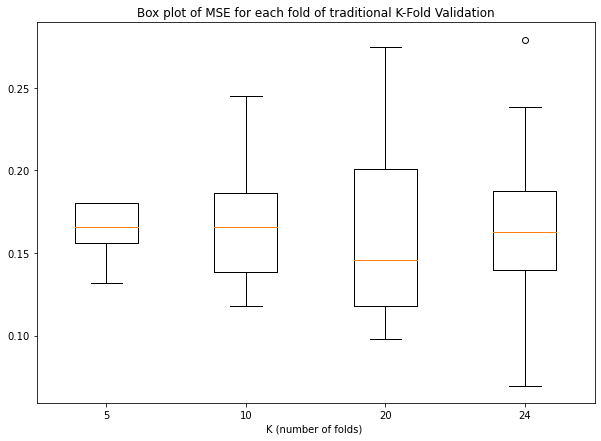

In [748]:
#ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# Creating dataset
data = [metrics_5, metrics_10, metrics_20, metrics_24]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance (horizontal box plot)
bp = ax.boxplot(data, vert = 1)

# x-axis labels
#ax.set_yticklabels([''])
ax.set_xlabel('K (number of folds) ')
ax.set_xticklabels(['5', '10', '20', '24'])

    
# Adding title
plt.title("Box plot of MSE for each fold of traditional K-Fold Validation")

mean_GDP = np.mean(data)
median_GDP = np.median(data)
print()



C:\Users\rsvpr\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Users\rsvpr\anaconda3\lib\site-packages\numpy\lib\function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


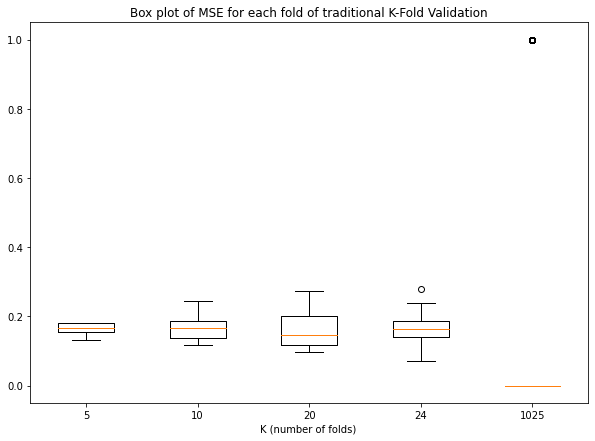

In [749]:
# WITH LOOCV

#ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# Creating dataset
data = [metrics_5, metrics_10, metrics_20, metrics_24, metrics_1025]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance (horizontal box plot)
bp = ax.boxplot(data, vert = 1)

# x-axis labels
#ax.set_yticklabels([''])
ax.set_xlabel('K (number of folds) ')
ax.set_xticklabels(['5', '10', '20', '24', '1025'])

    
# Adding title
plt.title("Box plot of MSE for each fold of traditional K-Fold Validation")

mean_GDP = np.mean(data)
median_GDP = np.median(data)
print()



In [533]:
LOOCV_MSPE = pd.DataFrame({"LOOCV MSPE:": metrics_1025}).value_counts()
LOOCV_MSPE

LOOCV MSPE:
0.0            861
1.0            164
dtype: int64

In [538]:
print(f"MSPE of LOOCV: {LOOCV_MSPE[1]/(LOOCV_MSPE[0] + LOOCV_MSPE[1])}")
print(f"Variance of LOOCV: {np.var(metrics_1025)}")

MSPE of LOOCV: 0.16
Variance of LOOCV: 0.13439999999999996


### LOOCV results

LOOCV (leave one out cross validation) produces a similar MSPE to other k-folds (between .16 and .17). However, the variance is much higher (.134 for LOOCV while for K values less than 24, variance was always under .003).

It seems that LOOCV takes more resources, and does not provide a much different estimate of the mean MSPE. The increase in variance also makes this undesirable.



### Make a summary Table

In [753]:
numFolds= ['5', '10', '20', '24', '1025']

kfold_metrics = pd.DataFrame({"fold":[], "MSPE mean":[], "MSPE variance": [] })

for metric, fold in zip(data, numFolds):
    kfold_metrics.loc[len(kfold_metrics.index)]  =[fold,np.mean(metric),np.var(metric)  ]
    #print(metric)
    print(f"For K = {fold}, mean = {np.mean(metric)}")
    print(f"For K = {fold}, length = {len(metric)}")
    print(f"For K = {fold}, variance = {np.var(metric)}")

# Make summary data into a datatframe for export
kfold_metrics.to_clipboard()
kfold_metrics

For K = 5, mean = 0.1629268292682927
For K = 5, length = 5
For K = 5, variance = 0.00032932778108268873
For K = 10, mean = 0.16785646297353893
For K = 10, length = 10
For K = 10, variance = 0.0013880010150029306
For K = 20, mean = 0.1630656108597285
For K = 20, length = 20
For K = 20, variance = 0.002888944554211057
For K = 24, mean = 0.16394425987449243
For K = 24, length = 24
For K = 24, variance = 0.0021089088590987943
For K = 1025, mean = 0.16
For K = 1025, length = 1025
For K = 1025, variance = 0.13439999999999996


,fold,MSPE mean,MSPE variance
0,5,0.162927,0.000329
1,10,0.167856,0.001388
2,20,0.163066,0.002889
3,24,0.163944,0.002109
4,1025,0.160000,0.134400


# Sect.5
# Multiple Predicting Cross Validation
### Method used from Jung 2017

[Back to top](#TOC)

In [742]:
np.random.seed(1212)

def MPCV(data, target_col ="target", fold_count=10):
    # set random seed
    np.random.seed(1212)
    
    indices = list(range(len( data)))
    metrics = []
    
    # Make dictionary for every record  with key value of index pointing to empty list to store predictions.
    # will average this list in the end
    index_prediction_dict  = {}
    for index in indices:
        index_prediction_dict[index] = []
    
    #np.random.shuffle(indices)
    folds = make_folds(indices, fold_count)
    for fold in folds:
        
        # MPCV DIFFERENCE, TRAINING DATA = HOLD OUT FOLD;
        # (K - 1) PREDICTIONS PER RECORD (AVERAGE)
        
        # Make train and test data
        train_data  = data.iloc[fold]
        test_indices = [idx not in fold for idx in indices]
        test_data  = data.iloc[test_indices]
        test_indices = pd.DataFrame({"index":indices})[test_indices].values
        test_indices = np.ravel(test_indices)
        
        print(f"Len test:{len(test_data)}\nLen Train: {len(train_data)}")
        
        #print("test indicies:\n", test_indices)
        
        # split train data into features (X) and target (Y). Adds col of 1's to X for constant term
        train_data_X_plus_constant, train_Y = prepare_input_matrix(train_data , target_col = 'target')
        
        #print("train_data_X_plus_constant:\n", train_data_X_plus_constant)
        
        # Fit Lin Reg Model to Train data X and Y
        B_hat = linear_regression( train_data_X_plus_constant, train_Y)
        #print(f"Estimate of model parameters (B_hat):\n {B_hat}")
        
        # split test data into features (X) and target (Y). Adds col of 1's to X for constant term
        test_data_X_plus_constant, test_Y = prepare_input_matrix(test_data , target_col = 'target')
        
        # Apply model to the the test X
        test_y_prediction = predict(B_hat , test_data_X_plus_constant)
        test_y_prediction = np.ravel(test_y_prediction)
        
        # MAP predictions to index/record (multiple predictions)
        for index, prediction in zip(test_indices,test_y_prediction):
            #print(f"index is: {index} Prediction is: {prediction} ")
            index_prediction_dict[index].append(prediction)
        
        #print("Test y_prectitions: Size: ", test_y_prediction.shape, test_y_prediction)
        # Assess error of prediction
        MSPE_errors, MSE = MSPE(np.matrix(test_y_prediction).T, np.matrix(test_Y).T )
        print("Mean Squared Prediction Error: ",MSE) #error)
        
        #metric = evaluate(results)
        metrics.append(MSE)
        print("="*100)
        print()
        
    # average mulitple prediction values for each index:
    index_prediction_average_dict = {}
    for key in index_prediction_dict:
        # average (k - 1) prediction value, and round to 1 if > .5 for binary classification
        prediction_value = np.mean(index_prediction_dict[key])
        if prediction_value > 0.5:
            prediction_value = 1
        else:
            prediction_value = 0
        index_prediction_average_dict[key] = prediction_value
    
    #averaged over (k-1) predictions
    y_predictions = list(index_prediction_average_dict.values())
    #print(y_predictions)
    
    # Assess error of prediction across whole dataset (average of k-1 predictions)
    MSPE_errors_MPCV, MSPE_MPCV = MSPE(np.matrix(y_predictions).T, np.matrix(data[target_col]).T )
    print("Mean Squared Prediction Error via Multiple Predicting Cross Validation: ",MSPE_MPCV) #error)
            
    # temporary return prediction dictionary
    #return index_prediction_average_dict
    return metrics, MSPE_MPCV

In [743]:
metrics_MPCV_5, MSPE_MPCV_5 = MPCV(heart, fold_count = 5)
#pd.DataFrame(data = {"index":metrics_MPCV_5}).value_counts()

#metrics_MPCV_5
MSPE_MPCV_5

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17804878048780487

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.15

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17560975609756097

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17073170731707318

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.14878048780487804

Mean Squared Prediction Error via Multiple Predicting Cross Validation:  0.14926829268292682


0.14926829268292682

In [744]:
heart.to_clipboard()

In [ ]:
#Previous metrics MPCV for 5 fold without averaging
metrics_MPCV_5

[0.16341463414634147,
 0.1878048780487805,
 0.14512195121951219,
 0.15853658536585366,
 0.16829268292682928]

In [ ]:
# TESTING HOW TO AVERAGE EVERY PREDICTION PER SAMPLE IN MPCV
data = heart

indices = list(range(len( data)))

# Make dictionary for every record  with key value of index pointing to empty list to store predictions.
# will average this list in the end
index_prediction_dict  = {}
for index in indices:
    index_prediction_dict[index] = []

    
#np.random.shuffle(indices)
folds = make_folds(indices, 5)

counter  = 1

for fold in folds:
    
    # makes ~ folds
    test_indices = [idx not in fold for idx in indices]
    
    testing_indices =  pd.DataFrame({"index":indices})[test_indices].values
    
    # Assign "prediction values" to index_prediction_dict
    for index in testing_indices:
        index_prediction_dict[index[0]].append(counter)

        
    # average mulitple prediction values for each index:
    index_prediction_average_dict = {}
    for key in index_prediction_dict:
        index_prediction_average_dict[key] = np.mean(index_prediction_dict[key])
        
    counter = counter +1
    
(index_prediction_dict)
#list(index_prediction_average_dict.values())

In [715]:
test_dict = {10:list(), 11:[]}

test_list = []
test_list.append(10)
for x in range (100):
    test_list.append(x)

x= test_dict[10]
x.append(11)
print(type(x))
x

test_dict[10] = test_list
test_dict[11].append(100)

# average dicts
test_dict

#np.mean(test_dict[10])

for key in test_dict:
    print(key, np.mean(test_dict[key]))
    


<class 'list'>
10 49.10891089108911
11 100.0


### Run K-fold cross validation on HEART DATA with k = 5

In [754]:
metrics_MPCV_5, MSPE_MPCV_5 = MPCV(heart, fold_count = 5)


Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17804878048780487

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.15

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17560975609756097

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17073170731707318

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.14878048780487804

Mean Squared Prediction Error via Multiple Predicting Cross Validation:  0.14926829268292682


In [762]:
metrics_MPCV_5, MSPE_MPCV_5 = MPCV(heart, fold_count = 5)

metrics_MPCV_10, MSPE_MPCV_10 = MPCV(heart, fold_count = 10)

metrics_MPCV_20, MSPE_MPCV_20 = MPCV(heart, fold_count = 20)

metrics_MPCV_24, MSPE_MPCV_24 = MPCV(heart, fold_count = 24)



Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17804878048780487

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.15

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17560975609756097

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.17073170731707318

Len test:820
Len Train: 205
Model shape:  (14,)
Input shape:  (820, 14)
Mean Squared Prediction Error:  0.14878048780487804

Mean Squared Prediction Error via Multiple Predicting Cross Validation:  0.14926829268292682
Len test:922
Len Train: 103
Model shape:  (14,)
Input shape:  (922, 14)
Mean Squared Prediction Error:  0.18004338394793926

Len test:922
Len Train: 103
Model shape:  (14,)
Input shape:  (922, 14)
Mean Squared Prediction Error:  0.19414316702819956

Len test:922
Len Train: 103
Model shape:  (14,)

### Plot Multiple Predicted CV results for the same fold counts:

Text(0.5, 1.0, 'Box plot of mean MSE for each fold of Multiple-Predicting K-Fold Validation')

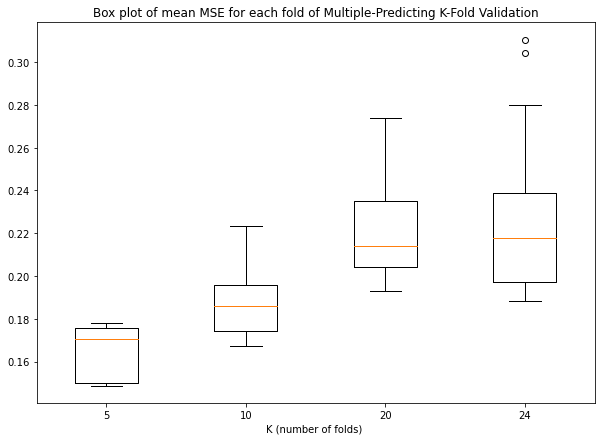

In [763]:
#ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# Creating dataset
data = [metrics_MPCV_5, metrics_MPCV_10, metrics_MPCV_20, metrics_MPCV_24]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance (horizontal box plot)
bp = ax.boxplot(data, vert = 1)

# x-axis labels
ax.set_xlabel('K (number of folds) ')
ax.set_xticklabels(['5', '10', '20', '24'])
    
# Adding title
plt.title("Box plot of mean MSE for each fold of Multiple-Predicting K-Fold Validation")


### Make a summary Table

In [768]:
numFolds= ['5', '10', '20', '24']

averaged_prediction_MSPE  = [MSPE_MPCV_5, MSPE_MPCV_10, MSPE_MPCV_20, MSPE_MPCV_24] 

kfold_metrics = pd.DataFrame({"fold":[], "MSPE mean":[], "MSPE variance": [], "MSPE of average prediction of folds": []})

for metric, fold, avg_MSPE in zip(data, numFolds,averaged_prediction_MSPE):
    kfold_metrics.loc[len(kfold_metrics.index)]  =[fold,np.mean(metric),np.var(metric) , avg_MSPE  ]
    #print(metric)
    print(f"For K = {fold}, mean = {np.mean(metric)}")
    print(f"For K = {fold}, length = {len(metric)}")
    print(f"For K = {fold}, variance = {np.var(metric)}")
    print(f"For K = {fold}, MSPE of average prediction of folds = {avg_MSPE}")
    print()


# Make summary data into a datatframe for export
kfold_metrics.to_clipboard()
kfold_metrics

For K = 5, mean = 0.16463414634146342
For K = 5, length = 5
For K = 5, variance = 0.00016061867935752533
For K = 5, MSPE of average prediction of folds = 0.14926829268292682

For K = 10, mean = 0.18818092939415235
For K = 10, length = 10
For K = 10, variance = 0.00026424337086966733
For K = 10, MSPE of average prediction of folds = 0.15707317073170732

For K = 20, mean = 0.22032970279687078
For K = 20, length = 20
For K = 20, variance = 0.0004449750632521636
For K = 20, MSPE of average prediction of folds = 0.16195121951219513

For K = 24, mean = 0.2242589828165024
For K = 24, length = 24
For K = 24, variance = 0.001192010850347808
For K = 24, MSPE of average prediction of folds = 0.14634146341463414



,fold,MSPE mean,MSPE variance,MSPE of average prediction of folds
0,5,0.164634,0.000161,0.149268
1,10,0.188181,0.000264,0.157073
2,20,0.220330,0.000445,0.161951
3,24,0.224259,0.001192,0.146341


# Sect.6
# Comparison with Leave One Out Validation

[Back to top](#TOC)